<a href="https://colab.research.google.com/github/princeKike27/Radio-Signals-from-Outer-Space-Classifier/blob/main/Radio_Signals_from_Outer_Space_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Radio Signals from Outer Space Classifier

- I'm going to use 2D Spectograms from Deep Space Radio Signals collected by the SETI *(Search for Extraterrestrial Intelligence)* Institute. SETI uses the  Allen Telescope to  scan the star systems of known *ExoPlanets* at various radio frequencies, in order,  to detect faint but consistent radio signals (narrow band waves) from these systems.

  - By treating the 2D Spectograms as images I'm going to build and train a Neural Network that classifies each radio signal into 1 of 4 categories.


<br>

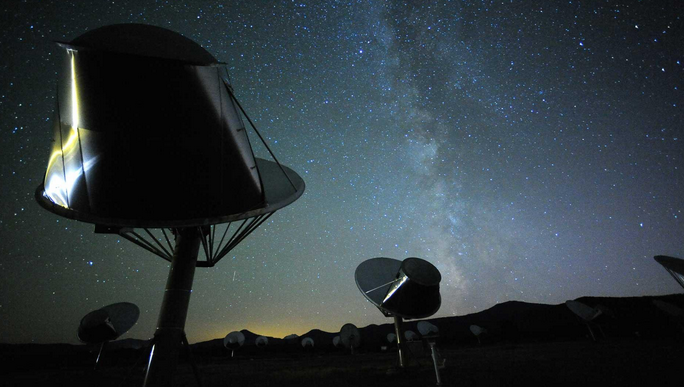

<br>




In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
sns.set()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading Data from Google Drive

In [2]:
# connect to google drive
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# go to Project Dir
%cd '/content/gdrive/MyDrive/Data Science/Projects/Portafolio/Classifying Radio Signals from Outer Space'

# check contents
%ls 

/content/gdrive/MyDrive/Data Science/Projects/Portafolio/Classifying Radio Signals from Outer Space
'CNN - Radio Signals from Outer Space Classifier.ipynb'   test_labels.csv
'Radio Signals from Outer Space Classifier.ipynb'         train_images.csv
 test_images.csv                                          train_labels.csv


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Image Data

<br>

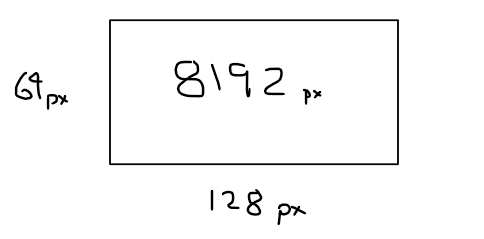

<br>

- Each *Spectogram* image was converted into raw pixel intensity values and Normalized, now each pixel value ranges between $0$ and $1$

  - Each *Spectogram* is $64 \times 128 ⟶ 8192$ pixels
  - Since the Images were converted into 2D *Spectograms* their Channel == 1, or Gray Scale

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### $X$ Inputs

<br>

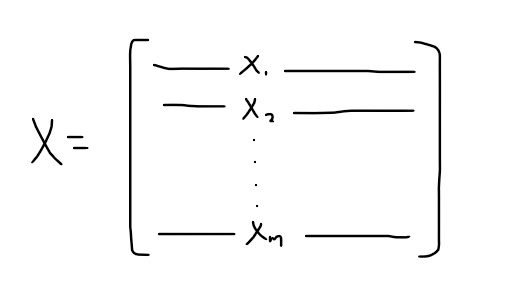

<br>

- Each Row in X_Train and X_Test corresponds to a *Spectogram* Example and each Column to a Pixel Value

  - $X$ needs to be TRANSPOSED so it can be fed into the Neural Network its new dimensions will be $(8192 \times m)$

    - Each Column will now be a *Spectogram* Example and each Row will correspond to a Pixel Value

<br>

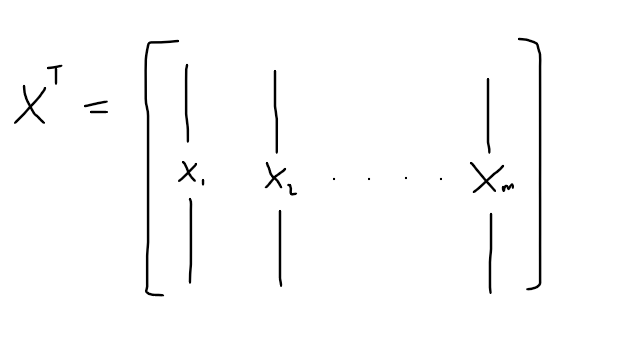

<br>


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### $X$ Train

In [56]:
# load train images
train_images = pd.read_csv('train_images.csv', header=None)

train_images

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.631373,0.666667,0.627451,0.607843,0.639216,0.615686,0.623529,0.588235,0.611765,0.635294,...,0.592157,0.611765,0.596078,0.607843,0.639216,0.658824,0.643137,0.627451,0.607843,0.647059
3196,0.662745,0.627451,0.686275,0.615686,0.639216,0.717647,0.674510,0.643137,0.729412,0.701961,...,0.603922,0.627451,0.662745,0.654902,0.701961,0.701961,0.647059,0.615686,0.635294,0.623529
3197,0.647059,0.650980,0.643137,0.596078,0.529412,0.568627,0.607843,0.631373,0.635294,0.658824,...,0.631373,0.658824,0.639216,0.647059,0.619608,0.603922,0.603922,0.643137,0.619608,0.564706
3198,0.694118,0.709804,0.580392,0.650980,0.631373,0.686275,0.623529,0.650980,0.678431,0.666667,...,0.658824,0.674510,0.615686,0.686275,0.670588,0.619608,0.678431,0.682353,0.623529,0.647059


In [58]:
# create X_train array
X_train = np.array(train_images)

# check shape
print(f'X_train shape: {X_train.shape}', '\n')

X_train

X_train shape: (3200, 8192) 



array([[0.631373, 0.623529, 0.713726, ..., 0.694118, 0.658824, 0.666667],
       [0.72549 , 0.752941, 0.74902 , ..., 0.698039, 0.701961, 0.72549 ],
       [0.717647, 0.701961, 0.713726, ..., 0.678431, 0.737255, 0.67451 ],
       ...,
       [0.647059, 0.65098 , 0.643137, ..., 0.643137, 0.619608, 0.564706],
       [0.694118, 0.709804, 0.580392, ..., 0.682353, 0.623529, 0.647059],
       [0.631373, 0.611765, 0.701961, ..., 0.65098 , 0.658824, 0.686275]])

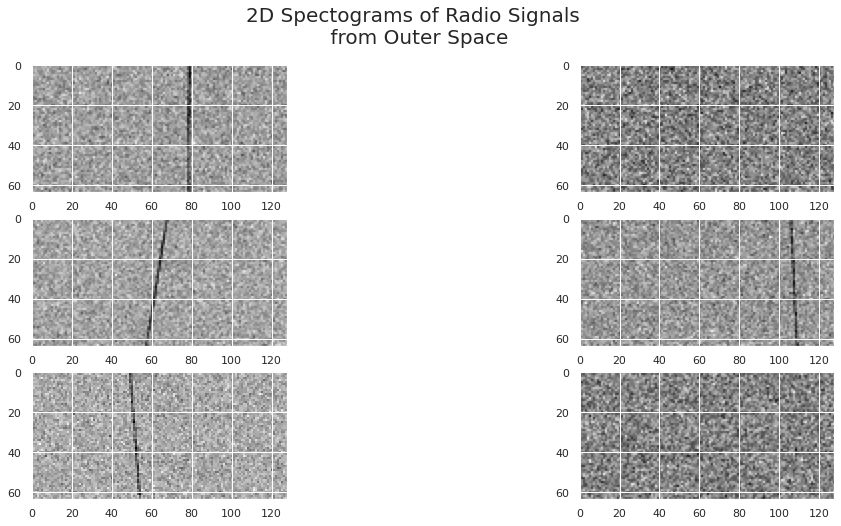

In [6]:
# plot 6 random Spectograms
fig = plt.figure(figsize=(18, 8))

for i in range(1, 7):
  # draw subplot
  plt.subplot(3, 2, i)
  # select random spectogram
  spectogram = X_train[np.random.randint(0, X_train.shape[0]), :]
  # reshape spectogram
  spectogram = spectogram.reshape(64, 128)
  # multiply by 255 pixels >> Unnormalize
  spectogram *= 255
  # plot image
  plt.imshow(spectogram, cmap='gray')

plt.suptitle('2D Spectograms of Radio Signals \n from Outer Space', size=20)

plt.show()

- Each of the six 2D *Spectograms* shown above correspond to 1 of the 4 Classes of Radio Signals:

  - *Squiggle*
  - *Narrow Band*
  - *Noise*
  - *Narrow Band DRD*

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### $X$ Test

In [7]:
# load test images
test_images = pd.read_csv('test_images.csv', header=None)

test_images

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.686275,0.725490,0.737255,0.694118,0.658824,0.674510,0.643137,0.752941,0.678431,0.654902,...,0.674510,0.709804,0.643137,0.674510,0.682353,0.658824,0.741176,0.658824,0.705882,0.701961
1,0.615686,0.631373,0.705882,0.678431,0.698039,0.639216,0.619608,0.654902,0.678431,0.682353,...,0.662745,0.674510,0.674510,0.721569,0.709804,0.666667,0.619608,0.709804,0.705882,0.682353
2,0.670588,0.690196,0.698039,0.647059,0.650980,0.670588,0.721569,0.701961,0.647059,0.678431,...,0.666667,0.670588,0.682353,0.698039,0.662745,0.619608,0.650980,0.662745,0.717647,0.650980
3,0.682353,0.650980,0.682353,0.670588,0.690196,0.701961,0.721569,0.709804,0.690196,0.650980,...,0.694118,0.737255,0.733333,0.717647,0.674510,0.678431,0.745098,0.705882,0.709804,0.717647
4,0.647059,0.690196,0.717647,0.666667,0.654902,0.639216,0.654902,0.674510,0.682353,0.674510,...,0.662745,0.682353,0.698039,0.705882,0.662745,0.678431,0.682353,0.725490,0.670588,0.658824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.603922,0.662745,0.658824,0.678431,0.647059,0.654902,0.639216,0.631373,0.709804,0.674510,...,0.729412,0.686275,0.635294,0.690196,0.580392,0.592157,0.639216,0.650980,0.682353,0.654902
796,0.549020,0.678431,0.615686,0.549020,0.635294,0.580392,0.674510,0.556863,0.623529,0.650980,...,0.647059,0.650980,0.596078,0.596078,0.654902,0.635294,0.647059,0.549020,0.623529,0.631373
797,0.705882,0.686275,0.588235,0.670588,0.717647,0.654902,0.662745,0.662745,0.662745,0.647059,...,0.678431,0.717647,0.717647,0.666667,0.682353,0.666667,0.690196,0.658824,0.650980,0.662745
798,0.643137,0.654902,0.650980,0.674510,0.631373,0.615686,0.639216,0.615686,0.670588,0.647059,...,0.603922,0.619608,0.623529,0.552941,0.596078,0.611765,0.643137,0.588235,0.611765,0.666667


In [57]:
# create X_test array
X_test = np.array(test_images)

# check shape
print(f'X_test shape: {X_test.shape}', '\n')

X_test

X_test shape: (800, 8192) 



array([[0.686275, 0.72549 , 0.737255, ..., 0.658824, 0.705882, 0.701961],
       [0.615686, 0.631373, 0.705882, ..., 0.709804, 0.705882, 0.682353],
       [0.670588, 0.690196, 0.698039, ..., 0.662745, 0.717647, 0.65098 ],
       ...,
       [0.705882, 0.686275, 0.588235, ..., 0.658824, 0.65098 , 0.662745],
       [0.643137, 0.654902, 0.65098 , ..., 0.588235, 0.611765, 0.666667],
       [0.631373, 0.658824, 0.654902, ..., 0.639216, 0.639216, 0.658824]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### $X$ Transpose

- We need to Transpose *X_train* and *X_test* arrays so they can be fed into the Neural Network, each column will be now be a *Spectogram* Image from a Radio Signal

In [62]:
# create X_train Transpose
X_train_T = X_train.T

# check shape
print(f'X_train Transpose shape: {X_train_T.shape}', '\n')

X_train_T

X_train Transpose shape: (8192, 3200) 



array([[0.631373, 0.72549 , 0.717647, ..., 0.647059, 0.694118, 0.631373],
       [0.623529, 0.752941, 0.701961, ..., 0.65098 , 0.709804, 0.611765],
       [0.713726, 0.74902 , 0.713726, ..., 0.643137, 0.580392, 0.701961],
       ...,
       [0.694118, 0.698039, 0.678431, ..., 0.643137, 0.682353, 0.65098 ],
       [0.658824, 0.701961, 0.737255, ..., 0.619608, 0.623529, 0.658824],
       [0.666667, 0.72549 , 0.67451 , ..., 0.564706, 0.647059, 0.686275]])

In [64]:
# create X_test Transpose
X_test_T = X_test.T

# check shape
print(f'X_test Transpose shape: {X_test_T.shape}', '\n')

X_test_T

X_test Transpose shape: (8192, 800) 



array([[0.686275, 0.615686, 0.670588, ..., 0.705882, 0.643137, 0.631373],
       [0.72549 , 0.631373, 0.690196, ..., 0.686275, 0.654902, 0.658824],
       [0.737255, 0.705882, 0.698039, ..., 0.588235, 0.65098 , 0.654902],
       ...,
       [0.658824, 0.709804, 0.662745, ..., 0.658824, 0.588235, 0.639216],
       [0.705882, 0.705882, 0.717647, ..., 0.65098 , 0.611765, 0.639216],
       [0.701961, 0.682353, 0.65098 , ..., 0.662745, 0.666667, 0.658824]])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### $Y$ Labels

- The Labels consist of 4 Classes of Radio Signals, represented as One Hot Encoded Vectors:

  - $0 ⟶$ Squiggle
    - $[1, 0, 0 , 0]$

  - $1 ⟶ $ Narrow Band
    - $[0, 1, 0, 0]$

  - $2 ⟶$ Noise
    - $[0, 0, 1, 0]$

  - $3 ⟶$ Narrow Band DRD
    - $[0, 0, 0, 1]$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### $Y$ Train

- $Y$ Train needs to be Transposed so it can be used in the Neural Network

In [11]:
# load train labels
train_labels = pd.read_csv('train_labels.csv', header=None)

train_labels

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
3195,0.0,1.0,0.0,0.0
3196,0.0,1.0,0.0,0.0
3197,0.0,1.0,0.0,0.0
3198,0.0,1.0,0.0,0.0


In [12]:
# create Y_train array
Y_train = np.array(train_labels)

# check shape
print(f'Y_train shape: {Y_train.shape}', '\n')

Y_train

Y_train shape: (3200, 4) 



array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [13]:
# create Y_train Transpose
Y_train_T = Y_train.T

# check shape
print(f'Y_train Transpose shape: {Y_train_T.shape}', '\n')

Y_train_T

Y_train Transpose shape: (4, 3200) 



array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- Each column of *Y_train* Transpose corresponds to a Radio Signal Label

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




#### $Y$ Test


In [14]:
# load test labels
test_labels = pd.read_csv('test_labels.csv', header=None)

test_labels

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
795,0.0,1.0,0.0,0.0
796,0.0,1.0,0.0,0.0
797,0.0,1.0,0.0,0.0
798,0.0,1.0,0.0,0.0


In [15]:
# create Y_test array
Y_test = np.array(test_labels)

# check shape
print(f'Y_test shape: {Y_test.shape}', '\n')

Y_test

Y_test shape: (800, 4) 



array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Nerual Network Model

- Neural Network Architecture

<br>

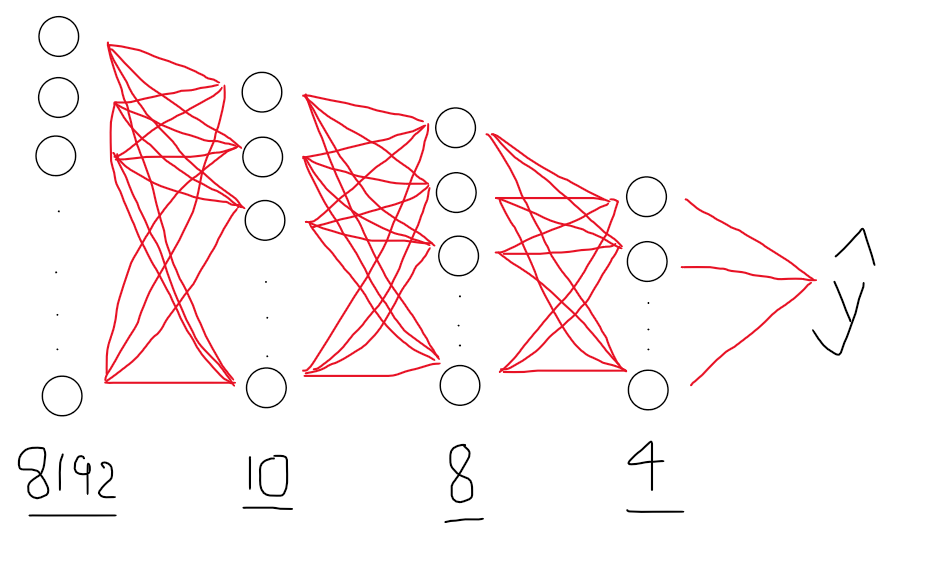

<br>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Forward Propagation

- We Activate the Neurons from Left to Right with Randomized Values of Parameters $\vec{W}$ and $b$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### First Hidden Layer

<br>

- $A^{[0]} ⟶ $ Input Layer:  
  - $A^{[0]} ⟶ (8192 \times m)$

<br>

- $\vec{w^{[1]}} ⟶$ Initialized with Random Values
  - $\vec{w^{[1]}} ⟶ (10 \times 8192)$

<br>

- $b^{[1]} ⟶$ Initialized with Random Values
  - $b^{[1]} ⟶ (10 \times 1)$

<br>

$$ Z^{[1]}_{(10 \times m)} = \vec{w}^{[1]}_{(10 \times 8192)} \times A^{[0]}_{(8192 \times m)} + b^{[1]}_{(10 \times 1)} $$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


<br>

- $\vec{w}^{[1]}$ 

In [16]:
# initialize W_1 with random values
W_1 = np.random.rand(10 , 8192) - 0.5

# check shape
print(f'W_1 shape: {W_1.shape}', '\n')

# check first 5 cols
W_1[:, 0:5]

W_1 shape: (10, 8192) 



array([[-0.07749111,  0.23702225,  0.38996935, -0.12481365, -0.28597415],
       [ 0.21000599, -0.43432156, -0.33811376,  0.45465142, -0.08420794],
       [-0.31337379, -0.12794487,  0.37170029,  0.27889746,  0.02564042],
       [-0.26603135,  0.20580028,  0.38751651,  0.49311279, -0.47503567],
       [-0.27288044, -0.38589824, -0.20408962,  0.08683755,  0.27049962],
       [ 0.35774451, -0.05099018,  0.28185277,  0.22557316, -0.18208421],
       [-0.03925984, -0.39953719, -0.46536558, -0.33683475, -0.20012658],
       [-0.01355617,  0.1850642 , -0.25876409,  0.4998555 , -0.05873134],
       [-0.27013339,  0.41539248, -0.18420199,  0.19121039, -0.34347175],
       [ 0.22788148, -0.32726189, -0.26813099, -0.03492862,  0.02569586]])

<br>

- $b^{[1]}$

In [17]:
# initialize b_1 with random values
b_1 = np.random.rand(10, 1) - 0.5

# check shape
print(f'b_1 shape: {b_1.shape}', '\n')

b_1

b_1 shape: (10, 1) 



array([[-0.41628729],
       [ 0.26503463],
       [ 0.49154476],
       [ 0.43502469],
       [-0.40882892],
       [ 0.18706623],
       [ 0.08232178],
       [ 0.26060295],
       [-0.38962309],
       [ 0.48515286]])

<br>

- $Z^{[1]}$

In [65]:
# Z_1 >> np.dot(W_1, A_0) + b_1
Z_1 = np.dot(W_1, X_train_T) + b_1

# check shape
print(f'Z_1 shape: {Z_1.shape}', '\n')

# check first 3 cols
Z_1[:, 0:3]

Z_1 shape: (10, 3200) 



array([[  2.00769913,   4.76242972,   0.70952578],
       [ 13.98916791,  15.98372459,  14.10994527],
       [ -5.16028906,  -4.70049998,  -5.43988345],
       [ -1.12037777,   0.41454104,   1.10797156],
       [-13.6623813 , -14.6835568 , -14.90917611],
       [  5.84114145,   5.36485472,   5.18321162],
       [-22.52268575, -22.76079244, -21.39817402],
       [-18.29885558, -19.44999489, -19.90835657],
       [  7.52506411,   8.48110694,   4.98553383],
       [-10.31514607, -11.12483718,  -9.53756327]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### Activation Function of Layer 1

- We need to apply an Activation Function to each Neuron else they will just be a Linear Combination of the Previous Layer

  - We are going to use the *Rectified Linear Unit* or **ReLu** as an Activation Function
  - **ReLu** is a Non Linear Function when the Input $Z^{(i)}$ is less than $0$ and a Linear Function when $Z^{(i)}$ is greater than $0$

  <br>

  $$ ReLu(Z) = max(0, Z) $$

  <br>

  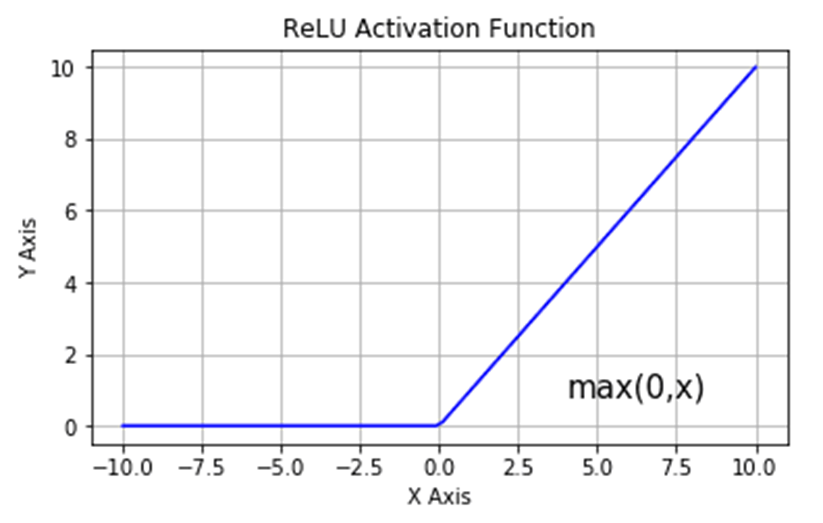

  <br>


In [68]:
# A_1 >> ReLu(Z_1)
A_1 = np.maximum(0, Z_1)

# check shape
print(f'A_1 shape: {A_1.shape}', '\n')

# check first 3 cols
A_1[:, 0:3]

A_1 shape: (10, 3200) 



array([[ 2.00769913,  4.76242972,  0.70952578],
       [13.98916791, 15.98372459, 14.10994527],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.41454104,  1.10797156],
       [ 0.        ,  0.        ,  0.        ],
       [ 5.84114145,  5.36485472,  5.18321162],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 7.52506411,  8.48110694,  4.98553383],
       [ 0.        ,  0.        ,  0.        ]])

In [70]:
np.max(A_1)

18.695223282216883

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### Second Hidden Layer

<br>

- $A^{[1]} ⟶$ Output of Layer 1
  - $A^{[1]} ⟶ (10 \times m)$

<br>

- $\vec{w}^{[2]} ⟶$ Initialized with Random Values
  - $\vec{w}^{[2]} ⟶ (8 \times 10)$

<br>

- $b^{[2]} ⟶$ Initialized with Random Values
  - $b^{[2]} ⟶ (8 \times 1)$


<br>

$$ Z^{[2]}_{(8 \times m)} = \vec{w}^{[2]}_{(8 \times 10)} \times A^{[1]}_{(10 \times m)} + b^{[2]}_{(8 \times 1)} $$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


<br>

- $\vec{w}^{[2]}$

In [20]:
# initialize W_2 with Random Values
W_2 = np.random.rand(8, 10) - 0.5

# check shape
print(f'W_2 shape: {W_2.shape}', '\n')

# check first 5 cols
W_2[:, 0:5]

W_2 shape: (8, 10) 



array([[ 0.06248382, -0.47687683,  0.06052229, -0.43230303,  0.41222893],
       [ 0.39458632, -0.10629644, -0.18675168,  0.23208788,  0.29117609],
       [-0.24854353, -0.38716995,  0.35282449,  0.28058926, -0.47321901],
       [-0.23894978,  0.39061104,  0.25697906,  0.30705821,  0.43801683],
       [ 0.27962291,  0.03493251,  0.25200652,  0.0348078 , -0.14348268],
       [-0.41919865,  0.06504867, -0.29003683,  0.03379221,  0.06917764],
       [-0.07768099,  0.46016816, -0.33096755, -0.18588581, -0.36129871],
       [ 0.05362788, -0.16668273, -0.3727115 ,  0.43030616,  0.2613943 ]])

<br>

- $b^{[2]}$

In [21]:
# initialize b_2 with Random Values
b_2 = np.random.rand(8, 1) - 0.5

# check shape
print(f'b_2 shape: {b_2.shape}', '\n')

b_2

b_2 shape: (8, 1) 



array([[-0.33879008],
       [ 0.35743753],
       [-0.26234666],
       [-0.31773405],
       [-0.37060245],
       [-0.44811566],
       [-0.21830764],
       [-0.06753252]])

<br>

- $Z^{[2]}]$

In [71]:
# Z_1 >> np.dot(W_2, A_1) + b_2
Z_2 = np.dot(W_2, A_1) + b_2

# check shape
print(f'Z_2 shape: {Z_2.shape}', '\n')

# check first 3 cols
Z_2[:, 0:3]

Z_2 shape: (8, 3200) 



array([[-6.07006219, -6.35364636, -7.57827974],
       [ 0.07362109,  1.19931564, -0.44328259],
       [-5.25512457, -6.80934741, -4.62303875],
       [ 4.38386823,  4.09202537,  5.72025685],
       [ 0.23495541,  1.56283712, -0.50650123],
       [ 0.55674915, -0.79362464,  1.32422459],
       [ 6.66397017,  7.86201327,  5.87817681],
       [-1.53390986, -1.33792791, -1.51692951]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### Activation Function of Layer 2

- **ReLU** is going to be used as the Activation Function of Layer 2

<br>

$$ ReLu(Z^{[2]}) = max(0, Z^{[2]})  $$

In [74]:
# A_2 >> np.maximum(0, Z_2)
A_2 = np.maximum(0, Z_2)

# check shape
print(f'A_2 shape: {A_2.shape}', '\n')

# check first 5 cols
A_2[:, 0:5]

A_2 shape: (8, 3200) 



array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.07362109, 1.19931564, 0.        , 0.        , 1.71184846],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [4.38386823, 4.09202537, 5.72025685, 5.20986564, 5.12943938],
       [0.23495541, 1.56283712, 0.        , 0.        , 1.51419446],
       [0.55674915, 0.        , 1.32422459, 0.86391544, 0.        ],
       [6.66397017, 7.86201327, 5.87817681, 6.86626946, 6.98747157],
       [0.        , 0.        , 0.        , 0.        , 0.29348976]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### Third Hidden Layer 

<br>

- $A^{[2]} ⟶$ Output of Layer 2
  - $A^{[2]} ⟶ (8 \times m)$

<br>

- $\vec{w}^{[3]} ⟶$ Initialized with Random Values
  - $\vec{w}^{[3]} ⟶ (4 \times 8)$

<br>

- $b^{[3]} ⟶$ Initialized with Random Values
  - $b^{[3]} ⟶ (4 \times 1)$

<br>

$$ Z^{[3]}_{(4 \times m)} = \vec{w}^{[3]}_{(4 \times 8)} \times A^{[2]}_{(8 \times m)} \times b^{[3]}_{(4 \times 1)}  $$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


<br>

- $\vec{w}^{[3]}$

In [30]:
# initialize W_3 with random values
W_3 = np.random.rand(4, 8) - 0.5

# check shape
print(f'W_3 shape: {W_3.shape}', '\n')

# check first 5 cols
W_3[:, 0:5]

W_3 shape: (4, 8) 



array([[ 0.09540008, -0.3069864 ,  0.23244101, -0.22377369, -0.1154088 ],
       [ 0.37057266, -0.06094808,  0.24208396, -0.13139661,  0.28141091],
       [-0.26541618, -0.49244817, -0.14623361, -0.23137735, -0.04691648],
       [-0.18964194,  0.23438538,  0.33054928,  0.24209839,  0.25923597]])

In [31]:
# initialize b_3 with random values
b_3 = np.random.rand(4, 1) - 0.5

# check shape
print(f'b_3 shape: {b_3.shape}', '\n')

b_3

b_3 shape: (4, 1) 



array([[ 0.20446557],
       [ 0.43404805],
       [-0.12205715],
       [ 0.42808369]])

In [77]:
# Z_3 >> np.dot(W_3 , A_2) + b_3
Z_3 = np.dot(W_3, A_2) + b_3

# check shape
print(f'Z_3 shape: {Z_3.shape}', '\n')

# check first 5 cols
Z_3[:, 0:5]

Z_3 shape: (4, 3200) 



array([[-1.95578475, -2.32307994, -2.41348513, -2.2441954 , -2.67607139],
       [ 2.94418073,  3.98888037,  2.15049618,  2.79621558,  3.44879028],
       [-1.01298679, -1.71961869, -1.05634016, -1.06847902, -2.1788114 ],
       [ 0.9386218 ,  1.43481457,  1.16703932,  1.00959008,  1.79982728]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### Activation Function of Layer 3

- We are going to use **SOFTMAX** as an Activation Function for Layer 3

  - **SOFTMAX** is used for Multi-Class Classification and it will give us the Probaility of the *Spectogram* of a Radio Signal being classified in each of the 4 Classes:  [*Squiggle, Narrow Band, Noise, Narrow Band DRD*]

<br>

$$ SoftMax(Z) = \frac{e^{Z^{(i)}}}{\sum_{k = 1}^{k} e^{Z^{(i)}}}  $$

In [80]:
# create SoftMax function
def SoftMax(Z):
  softmax_z = np.exp(Z) / np.sum(np.exp(Z), axis=0) # column-wise
  return softmax_z

In [82]:
# A_3 >> SotMax(Z_3)
A_3 = SoftMax(Z_3)

# check shape
print(f'A_3 shape: {A_3.shape}', '\n')

# check first 5 cols
A_3[:, 0:5]

A_3 shape: (4, 3200) 



array([[0.00641334, 0.00167557, 0.00731303, 0.0054153 , 0.00182615],
       [0.86121586, 0.92344889, 0.70179333, 0.83684463, 0.83470074],
       [0.01646402, 0.00306368, 0.02841175, 0.01754807, 0.00300258],
       [0.11590678, 0.07181186, 0.26248189, 0.140192  , 0.16047052]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### Forward Propagation Function

In [83]:
# function to calculate Forward Propagation
def calculate_forward_prop(X, W1, b1, W2, b2, W3, b3):

  # Layer 1
  Z1 = np.dot(W1, X) + b1
  A1 = np.maximum(0, Z1)

  # Layer 2
  Z2 = np.dot(W2, A1) + b2
  A2 = np.maximum(0, Z2)

  # Layer 3
  Z3 = np.dot(W3, A2) + b3
  A3 = SoftMax(Z3)

  return Z1, A1, Z2, A2, Z3, A3

In [84]:
# check function
z1, a1, z2, a2, z3, a3 = calculate_forward_prop(X_train_T, W_1, b_1, W_2, b_2, W_3, b_3)

# check shape of a3
print(f'a3 shape: {a3.shape}', '\n')

# check first 5 cols
a3[:, 0:5]

a3 shape: (4, 3200) 



array([[0.00641334, 0.00167557, 0.00731303, 0.0054153 , 0.00182615],
       [0.86121586, 0.92344889, 0.70179333, 0.83684463, 0.83470074],
       [0.01646402, 0.00306368, 0.02841175, 0.01754807, 0.00300258],
       [0.11590678, 0.07181186, 0.26248189, 0.140192  , 0.16047052]])

- Each column in $A^{[3]}$ corresponds to the Probabilities of a *Spectogram*, from a Radio Signal, of being classified in each of the 4 Classes:

  - $0 ⟶$ Squiggle
  - $1 ⟶$ Narrow Band
  - $2 ⟶$ Noise
  - $3 ⟶$ Narrow Band DRD

In [89]:
# check the class in which a3 classified the Spectograms
np.argmax(a3, axis=0)

array([1, 1, 1, ..., 1, 1, 1])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Backward Propagation

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)